<a href="https://colab.research.google.com/github/ShilpaVasista/Exploratory-Data-Analytics/blob/main/EDA_Lab_8_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab Exercise 8

Download a Twitter dataset containing tweets about a specific brand or event.
- Utilize libraries like NLTK or TextBlob to perform sentiment analysis on the
tweets.
- Explore the distribution of positive, negative, and neutral sentiment. Identify
keywords or phrases associated with each sentiment category.

Load the Twitter dataset containing tweets about a specific brand or event (fields: tweet_id, airline_sentiment, text, etc.).

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
import matplotlib.pyplot as plt
nltk.download('punkt')  # Ensure punkt tokenizer is downloaded
nltk.download('stopwords')  # Ensure stopwords are downloaded
# Check the availability of the necessary resources
nltk.data.find('tokenizers/punkt')
nltk.data.find('corpora/stopwords')



# Load dataset (replace with your actual file path)
df = pd.read_csv("Tweets.csv")

# Clean missing values (e.g., drop rows with missing sentiment or text)
df.dropna(subset=['airline_sentiment', 'text'], inplace=True)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Perform sentiment analysis using the airline_sentiment column as the target sentiment, and explore how the distribution of sentiments (positive, negative, neutral) varies.

In [ ]:
# Perform sentiment analysis on the 'text' column if 'airline_sentiment' is missing or for additional validation
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['calculated_sentiment'] = df['text'].apply(get_sentiment)
df['sentiment_label'] = df['calculated_sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Explore sentiment distribution
sentiment_distribution = df['sentiment_label'].value_counts()
print(sentiment_distribution)

sentiment_label
neutral     5494
positive    5477
negative    3669
Name: count, dtype: int64


Exploring Sentiment Distribution:

We plot a bar chart using seaborn to visualize the distribution of sentiments in the dataset.

<ipython-input-29-8209eb402729>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=df, palette="Set2")


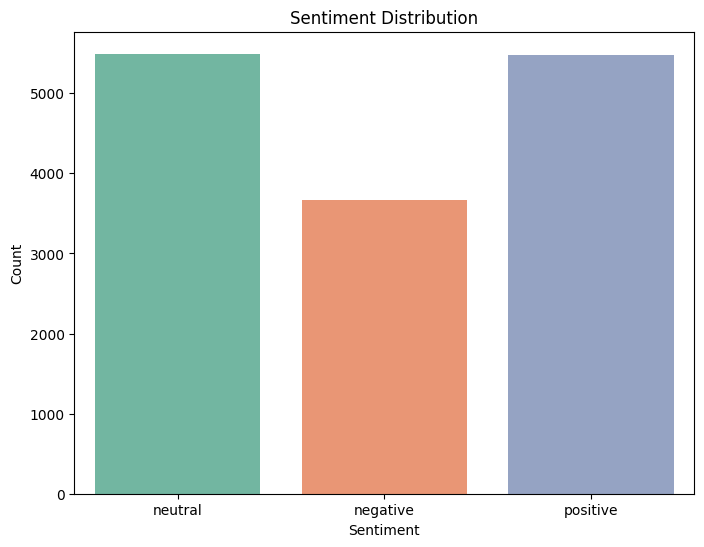

In [ ]:
# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', data=df, palette="Set2")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


Identify
keywords or phrases associated with each sentiment category.